In [601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [602]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [603]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [604]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [605]:
result = pd.merge(left, right, on='key')

In [606]:
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [607]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)


right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)

In [608]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [609]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [610]:
result = pd.merge(left, right, how='left', on=['key1', 'key2'])

In [611]:
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [612]:
result_out = pd.merge(left, right, how='outer', on=['key1', 'key2'])

In [613]:
result_out

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [614]:
left = pd.DataFrame({"A": [1, 2], "B": [2, 2]})

right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})

In [615]:
left

,A,B
0,1,2
1,2,2


In [616]:
right

,A,B
0,4,2
1,5,2
2,6,2


In [617]:
df1 = pd.DataFrame({"col1": [0, 1], "col_left": ["a", "b"]})

df2 = pd.DataFrame({"col1": [1, 2, 2], "col_right": [2, 2, 2]})

In [618]:
df1

,col1,col_left
0,0,a
1,1,b


In [619]:
df2

,col1,col_right
0,1,2
1,2,2
2,2,2


In [620]:
pd.merge(df1, df2, on='col1', how='outer', indicator=True)

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [621]:
pd.merge(df1, df2, on='col1', how='outer', indicator="Check")

,col1,col_left,col_right,Check
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [622]:
left = pd.DataFrame({"k": ["K0", "K1", "K2"], "v": [1, 2, 3]})

right = pd.DataFrame({"k": ["K0", "K0", "K3"], "v": [4, 5, 6]})

In [623]:
left

,k,v
0,K0,1
1,K1,2
2,K2,3


In [624]:
right

,k,v
0,K0,4
1,K0,5
2,K3,6


In [625]:
pd.merge(left, right, on='k')

,k,v_x,v_y
0,K0,1,4
1,K0,1,5


In [626]:
pd.merge(left, right, on='k', suffixes=('_left', '_right'))

,k,v_left,v_right
0,K0,1,4
1,K0,1,5


In [627]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

In [628]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [629]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [630]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [631]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [632]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)


right = pd.DataFrame({"C": ["C0", "C1"], "D": ["D0", "D1"]}, index=["K0", "K1"])

In [633]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


In [634]:
right

,C,D
K0,C0,D0
K1,C1,D1


In [635]:
left.join(right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [636]:
left.join(right)

,A,B,key,C,D
0,A0,B0,K0,NaN,NaN
1,A1,B1,K1,NaN,NaN
2,A2,B2,K0,NaN,NaN
3,A3,B3,K1,NaN,NaN


In [637]:
pd.merge(left, right, left_on='key', right_index=True, how='left', sort=False)

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [638]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
    }
)


index = pd.MultiIndex.from_tuples(
    [("K0", "K0"), ("K1", "K0"), ("K2", "K0"), ("K2", "K1")]
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=index
)


In [639]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [640]:
right

C   D
K0 K0  C0  D0
K1 K0  C1  D1
K2 K0  C2  D2
   K1  C3  D3

In [641]:
left.join(right, on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


In [642]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]},
    index=pd.Index(["K0", "K1", "K2"], name="key"),
)


index = pd.MultiIndex.from_tuples(
    [("K0", "Y0"), ("K1", "Y1"), ("K2", "Y2"), ("K2", "Y3")],
    names=["key", "Y"],
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]},
    index=index,
)


In [643]:
left

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [644]:
right

C   D
key Y         
K0  Y0  C0  D0
K1  Y1  C1  D1
K2  Y2  C2  D2
    Y3  C3  D3

In [645]:
left.join(right, how='inner')

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

In [646]:
leftindex = pd.MultiIndex.from_tuples(
    [("K0", "X0"), ("K0", "X1"), ("K1", "X2")], names=["key", "X"]
)


left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=leftindex
)


rightindex = pd.MultiIndex.from_tuples(
    [("K0", "Y0"), ("K1", "Y1"), ("K2", "Y2"), ("K2", "Y3")], names=["key", "Y"]
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=rightindex
)

In [647]:
left

A   B
key X         
K0  X0  A0  B0
    X1  A1  B1
K1  X2  A2  B2

In [648]:
right

C   D
key Y         
K0  Y0  C0  D0
K1  Y1  C1  D1
K2  Y2  C2  D2
    Y3  C3  D3

In [649]:
result = pd.merge(
    left.reset_index(), right.reset_index(),
    on=['key'], how='inner'
).set_index(['key', 'X', 'Y'])

In [650]:
result

A   B   C   D
key X  Y                 
K0  X0 Y0  A0  B0  C0  D0
    X1 Y0  A1  B1  C0  D0
K1  X2 Y1  A2  B2  C1  D1

In [651]:
left_index = pd.Index(["K0", "K0", "K1", "K2"], name="key1")

left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key2": ["K0", "K1", "K0", "K1"],
    },
    index=left_index,
)


right_index = pd.Index(["K0", "K1", "K2", "K2"], name="key1")

right = pd.DataFrame(
    {
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
        "key2": ["K0", "K0", "K0", "K1"],
    },
    index=right_index,
)


In [652]:
left

,A,B,key2
key1,,,
K0,A0,B0,K0
K0,A1,B1,K1
K1,A2,B2,K0
K2,A3,B3,K1


In [653]:
right

,C,D,key2
key1,,,
K0,C0,D0,K0
K1,C1,D1,K0
K2,C2,D2,K0
K2,C3,D3,K1


In [654]:
pd.merge(left, right, left_on=['key1','key2'], right_on=['key1','key2'])

,A,B,key2,C,D
key1,,,,,
K0,A0,B0,K0,C0,D0
K1,A2,B2,K0,C1,D1
K2,A3,B3,K1,C3,D3


In [655]:
df1 = pd.DataFrame(
    [[np.nan, 3.0, 5.0], [-4.6, np.nan, np.nan], [np.nan, 7.0, np.nan]]
)


df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5.0, 1.6, 4]], index=[1, 2])

In [656]:
df1

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,NaN
2,NaN,7.0,NaN


In [657]:
df2

,0,1,2
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


In [658]:
df1.combine_first(df2)

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


In [659]:
left = pd.DataFrame(
    {"k": ["K0", "K1", "K1", "K2"], "lv": [1, 2, 3, 4], "s": ["a", "b", "c", "d"]}
)


right = pd.DataFrame({"k": ["K1", "K2", "K4"], "rv": [1, 2, 3]})

In [660]:
left

,k,lv,s
0,K0,1,a
1,K1,2,b
2,K1,3,c
3,K2,4,d


In [661]:
right

,k,rv
0,K1,1
1,K2,2
2,K4,3


In [662]:
pd.merge_ordered(left, right, fill_method='ffill', left_by='s')

,k,lv,s,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


In [663]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}


df = pd.DataFrame(data)

In [664]:
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [665]:
df2 = df.pivot(index='date', columns='variable', values='value')

In [666]:
df2

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


In [667]:
df['value2'] = df['value'] * 2
df

,value,variable,date,value2
0,0,A,2020-01-03,0
1,1,A,2020-01-04,2
2,2,A,2020-01-05,4
3,3,B,2020-01-03,6
4,4,B,2020-01-04,8
5,5,B,2020-01-05,10
6,6,C,2020-01-03,12
7,7,C,2020-01-04,14
8,8,C,2020-01-05,16
9,9,D,2020-01-03,18


In [668]:
df3 = df.pivot(index='date', columns='variable')

In [669]:
df3

value           value2            
variable       A  B  C   D      A   B   C   D
date                                         
2020-01-03     0  3  6   9      0   6  12  18
2020-01-04     1  4  7  10      2   8  14  20
2020-01-05     2  5  8  11      4  10  16  22

In [670]:
df3['value2']

variable,A,B,C,D
date,,,,
2020-01-03,0,6,12,18
2020-01-04,2,8,14,20
2020-01-05,4,10,16,22


In [671]:
import datetime

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)

In [672]:
df

,A,B,C,D,E,F
0,one,A,foo,-0.304997,1.126079,2013-01-01
1,one,B,foo,0.672794,1.550817,2013-02-01
2,two,C,foo,0.954090,0.826973,2013-03-01
3,three,A,bar,1.323584,-0.677486,2013-04-01
4,one,B,bar,0.015720,2.087563,2013-05-01
5,one,C,bar,-0.815293,0.117134,2013-06-01
6,two,A,foo,0.164562,-0.855723,2013-07-01
7,three,B,foo,0.576599,0.082120,2013-08-01
8,one,C,foo,-0.813837,1.276149,2013-09-01
9,one,A,bar,1.020094,0.270969,2013-10-01


In [673]:
df.pivot_table(values='D', index=['A', 'B'], columns='C', aggfunc='mean')

C             bar       foo
A     B                    
one   A -0.184512  0.534676
      B  0.573479 -0.048207
      C -0.990184 -0.086264
three A  0.491971       NaN
      B       NaN  0.075883
      C  0.945446       NaN
two   A       NaN  0.178193
      B -0.085632       NaN
      C       NaN  0.429568

In [674]:
pd.pivot_table(df, values='D', index=pd.Grouper(freq="ME", key="F"), columns="C")

C,bar,foo
F,,
2013-01-31,NaN,0.534676
2013-02-28,NaN,-0.048207
2013-03-31,NaN,0.429568
2013-04-30,0.491971,NaN
2013-05-31,0.573479,NaN
2013-06-30,-0.990184,NaN
2013-07-31,NaN,0.178193
2013-08-31,NaN,0.075883
2013-09-30,NaN,-0.086264


In [675]:
table = df.pivot_table(
    index=['A', 'B'],
    columns='C',
    values=['D', 'E'],
    margins=True,
    aggfunc='std'
)

In [676]:
table.stack(future_stack=True)

D         E
A     B C                      
one   A bar  1.703569  1.050547
        foo  1.187478  1.682494
        All  1.268790  1.169203
      B bar  0.788790  0.220461
        foo  1.019649  1.903984
        All  0.826311  1.489620
      C bar  0.247332  0.195206
        foo  1.028944  0.516449
        All  0.803528  0.625351
three A bar  1.176078  1.264445
        foo       NaN       NaN
        All  1.176078  1.264445
      B bar       NaN       NaN
        foo  0.708119  0.281854
        All  0.708119  0.281854
      C bar  1.724413  0.643166
        foo       NaN       NaN
        All  1.724413  0.643166
two   A bar       NaN       NaN
        foo  0.019276  1.493700
        All  0.019276  1.493700
      B bar  0.640813  0.672305
        foo       NaN       NaN
        All  0.640813  0.672305
      C bar       NaN       NaN
        foo  0.741787  0.239703
        All  0.741787  0.239703
All     bar  1.092885  1.228655
        foo  0.687840  0.969771
        All  0.893485  1.087650

In [677]:
tuples = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [678]:
df

A         B
first second                    
bar   one     0.933280  0.410757
      two    -1.209116  1.072207
baz   one    -2.076376 -0.032087
      two    -1.179905  0.819041
foo   one     0.169362  0.395066
      two     1.793339  0.620358
qux   one     0.687095  0.924752
      two    -0.953211  0.272744

In [679]:
df2 = df.stack(future_stack=True)

In [680]:
df2.unstack()

A         B
first second                    
bar   one     0.933280  0.410757
      two    -1.209116  1.072207
baz   one    -2.076376 -0.032087
      two    -1.179905  0.819041
foo   one     0.169362  0.395066
      two     1.793339  0.620358
qux   one     0.687095  0.924752
      two    -0.953211  0.272744

In [681]:
df2.unstack(1)

second        one       two
first                      
bar   A  0.933280 -1.209116
      B  0.410757  1.072207
baz   A -2.076376 -1.179905
      B -0.032087  0.819041
foo   A  0.169362  1.793339
      B  0.395066  0.620358
qux   A  0.687095 -0.953211
      B  0.924752  0.272744

In [682]:
df2.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  0.933280 -2.076376  0.169362  0.687095
       B  0.410757 -0.032087  0.395066  0.924752
two    A -1.209116 -1.179905  1.793339 -0.953211
       B  1.072207  0.819041  0.620358  0.272744

In [683]:
df2.unstack('first')

first          bar       baz       foo       qux
second                                          
one    A  0.933280 -2.076376  0.169362  0.687095
       B  0.410757 -0.032087  0.395066  0.924752
two    A -1.209116 -1.179905  1.793339 -0.953211
       B  1.072207  0.819041  0.620358  0.272744

In [684]:
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    }
)

In [685]:
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [686]:
cheese.melt(id_vars=['first', 'last'], var_name='measurement')

,first,last,measurement,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [687]:
index = pd.MultiIndex.from_tuples([("person", "A"), ("person", "B")])

cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    },
    index=index,
)
cheese

first last  height  weight
person A  John  Doe     5.5     130
       B  Mary   Bo     6.0     150

In [688]:
cheese.melt(id_vars=['first', 'last'], ignore_index=False)

first last variable  value
person A  John  Doe   height    5.5
       B  Mary   Bo   height    6.0
       A  John  Doe   weight  130.0
       B  Mary   Bo   weight  150.0

In [689]:
df = pd.DataFrame({"key": list("bbacab"), "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [690]:
pd.get_dummies(df['key'])

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [691]:
df['key'].str.get_dummies()

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [692]:
values = np.random.randn(10)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,True
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [693]:
df = pd.DataFrame({"A": list("abc"), "B": [1.1, 2.2, 3.3]})
df

,A,B
0,a,1.1
1,b,2.2
2,c,3.3


In [694]:
pd.get_dummies(df, dtype=np.int32)

,B,A_a,A_b,A_c
0,1.1,1,0,0
1,2.2,0,1,0
2,3.3,0,0,1


In [695]:
keys = ["panda1", "panda2", "panda3"]

values = [["eats", "shoots"], ["shoots", "leaves", 'apples'], ["eats", "leaves"]]

df = pd.DataFrame({"keys": keys, "values": values})
df

,keys,values
0,panda1,"[eats, shoots]"
1,panda2,"[shoots, leaves, apples]"
2,panda3,"[eats, leaves]"


In [696]:
df.explode('values')

,keys,values
0,panda1,eats
0,panda1,shoots
1,panda2,shoots
1,panda2,leaves
1,panda2,apples
2,panda3,eats
2,panda3,leaves


In [697]:
a = np.array(["foo", "foo", "bar", "bar", "foo", "foo"], dtype=object)

b = np.array(["one", "one", "two", "one", "two", "one"], dtype=object)

c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny"], dtype=object)

In [698]:
pd.crosstab(a, [b, c])

col_0  one        two      
col_1 dull shiny dull shiny
row_0                      
bar      1     0    0     1
foo      2     1    1     0

In [699]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.273861,0.758493
1,bar,one,1.170565,0.884668
2,foo,two,2.148045,0.746053
3,bar,three,-0.124776,-0.498637
4,foo,two,0.082343,-0.767464
5,bar,two,0.335342,0.150005
6,foo,one,-1.174865,-1.407302
7,foo,three,0.523735,-0.082970


In [700]:
df.groupby('A')

In [701]:
df.groupby(['A', 'B'])

In [702]:
df2 = df.set_index(['A', 'B'])

In [703]:
df2

C         D
A   B                        
foo one    1.273861  0.758493
bar one    1.170565  0.884668
foo two    2.148045  0.746053
bar three -0.124776 -0.498637
foo two    0.082343 -0.767464
bar two    0.335342  0.150005
foo one   -1.174865 -1.407302
    three  0.523735 -0.082970

In [704]:
grouped = df2.groupby(df2.index.names.difference(['B']))

In [705]:
grouped.sum()

,C,D
A,,
bar,1.381131,0.536035
foo,2.853120,-0.753190


In [706]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'
    
grouped = df.T.groupby(get_letter_type)

In [707]:
grouped.last()

,0,1,2,3,4,5,6,7
consonant,0.758493,0.884668,0.746053,-0.498637,-0.767464,0.150005,-1.407302,-0.08297
vowel,foo,bar,foo,bar,foo,bar,foo,foo


In [708]:
df.T

,0,1,2,3,4,5,6,7
A,foo,bar,foo,bar,foo,bar,foo,foo
B,one,one,two,three,two,two,one,three
C,1.273861,1.170565,2.148045,-0.124776,0.082343,0.335342,-1.174865,0.523735
D,0.758493,0.884668,0.746053,-0.498637,-0.767464,0.150005,-1.407302,-0.08297


In [709]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [710]:
df3.groupby('X').get_group('A')

,X,Y
0,A,1
2,A,3


In [711]:
df3[df3['X'] == 'A']

,X,Y
0,A,1
2,A,3


In [712]:
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [713]:
len(df.groupby('A').groups)

2

In [714]:
n = 10

weight = np.random.normal(166, 20, size=n)

height = np.random.normal(60, 10, size=n)

time = pd.date_range("1/1/2000", periods=n)

gender = np.random.choice(["male", "female"], size=n)

df = pd.DataFrame(
    {"height": height, "weight": weight, "gender": gender}, index=time
)


df

,height,weight,gender
2000-01-01,61.041266,173.397042,male
2000-01-02,37.137033,149.611227,female
2000-01-03,51.780178,172.651651,female
2000-01-04,38.022387,182.301743,male
2000-01-05,71.534794,179.657668,male
2000-01-06,78.866632,206.368237,female
2000-01-07,67.579914,145.575888,male
2000-01-08,49.191728,191.280878,female
2000-01-09,58.394205,151.946814,male
2000-01-10,58.176337,116.712923,female


In [715]:
gb = df.groupby('gender')

female         Axes(0.1,0.15;0.363636x0.75)
male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

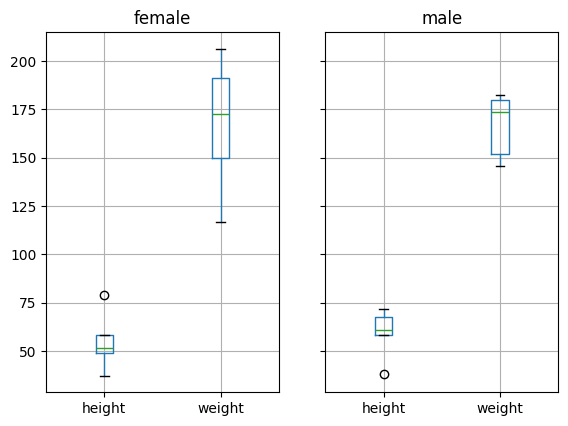

In [716]:
gb.boxplot()

In [717]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)

df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [718]:
df.groupby([pd.Grouper(level='first'), 'A']).count()

,,B
first,A,
bar,1,2
baz,1,2
foo,2,2
qux,3,2


In [719]:
grouped = df.groupby('first')

In [720]:
grouped_A = grouped['A']

In [721]:
grouped_A.mean()

first
bar    1.0
baz    1.0
foo    2.0
qux    3.0
Name: A, dtype: float64

In [722]:
grouped.mean()

,A,B
first,,
bar,1.0,0.5
baz,1.0,2.5
foo,2.0,4.5
qux,3.0,6.5


In [723]:
for name, group in grouped:
    print(f"GroupName: {name}")
    print(group)

GroupName: bar
              A  B
first second      
bar   one     1  0
      two     1  1
GroupName: baz
              A  B
first second      
baz   one     1  2
      two     1  3
GroupName: foo
              A  B
first second      
foo   one     2  4
      two     2  5
GroupName: qux
              A  B
first second      
qux   one     3  6
      two     3  7


In [724]:
grouped.get_group('qux')

A  B
first second      
qux   one     3  6
      two     3  7

In [725]:
grouped.sum()

,A,B
first,,
bar,2,1
baz,2,5
foo,4,9
qux,6,13


In [726]:
df.groupby('first').all()

,A,B
first,,
bar,True,False
baz,True,True
foo,True,True
qux,True,True


In [727]:
df.iloc[2, 0] = np.nan
df.iloc[5, 1] = np.nan

In [728]:
df

A    B
first second          
bar   one     1.0  0.0
      two     1.0  1.0
baz   one     NaN  2.0
      two     1.0  3.0
foo   one     2.0  4.0
      two     2.0  NaN
qux   one     3.0  6.0
      two     3.0  7.0

In [729]:
grouped.nth(0, dropna=None)

,,A,B
first,second,,
bar,one,1.0,0.0
baz,one,NaN,2.0
foo,one,2.0,4.0
qux,one,3.0,6.0


In [730]:
grouped.nunique()

,A,B
first,,
bar,1,2
baz,1,2
foo,1,1
qux,1,2


In [731]:
grouped.describe()

A                                        B                      \
      count mean  std  min  25%  50%  75%  max count mean       std  min   
first                                                                      
bar     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   2.0  0.5  0.707107  0.0   
baz     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0   2.0  2.5  0.707107  2.0   
foo     2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0   1.0  4.0       NaN  4.0   
qux     2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0   2.0  6.5  0.707107  6.0   

                             
        25%  50%   75%  max  
first                        
bar    0.25  0.5  0.75  1.0  
baz    2.25  2.5  2.75  3.0  
foo    4.00  4.0  4.00  4.0  
qux    6.25  6.5  6.75  7.0

In [732]:
grouped.agg('mean')

,A,B
first,,
bar,1.0,0.5
baz,1.0,2.5
foo,2.0,4.0
qux,3.0,6.5


In [733]:
grouped2 = df.groupby(['first', 'A'])

In [734]:
grouped2.agg('count').reset_index()

,first,A,B
0,bar,1.0,2
1,baz,1.0,1
2,foo,2.0,1
3,qux,3.0,2


In [735]:
grouped2.agg(lambda x: set(x))

,,B
first,A,
bar,1.0,"{0.0, 1.0}"
baz,1.0,{3.0}
foo,2.0,"{nan, 4.0}"
qux,3.0,"{6.0, 7.0}"


In [736]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
        "length": [1.2, 3.1, 4.9, 1.6]
    }
)
animals

,kind,height,weight,length
0,cat,9.1,7.9,1.2
1,dog,6.0,7.5,3.1
2,cat,9.5,9.9,4.9
3,dog,34.0,198.0,1.6


In [737]:
animals.groupby('kind').agg('mean', 'std')

,height,weight,length
kind,,,
cat,9.3,8.90,3.05
dog,20.0,102.75,2.35


In [738]:
animals.groupby('kind')[['height', 'length']].agg('mean', 'std')

,height,length
kind,,
cat,9.3,3.05
dog,20.0,2.35


In [739]:
animals.groupby('kind')['height'].agg(lambda x: set(x))

kind
cat     {9.1, 9.5}
dog    {34.0, 6.0}
Name: height, dtype: object

In [740]:
grouped = animals.groupby('kind')
(
    grouped[['height', 'weight']]
    .agg(['sum', 'mean', 'std'])
    .rename(columns={'sum': 'Total', 'mean': 'Avg', 'std': "Dispersion"})
)

height                  weight                    
      Total   Avg Dispersion  Total     Avg  Dispersion
kind                                                   
cat    18.6   9.3   0.282843   17.8    8.90    1.414214
dog    40.0  20.0  19.798990  205.5  102.75  134.703842

In [741]:
grouped['height'].agg([lambda x: x.max() - x.min(), lambda x: x.mean()/x.std()])

,<lambda_0>,<lambda_1>
kind,,
cat,0.4,32.880465
dog,28.0,1.010153


In [742]:
animals.groupby('kind').agg(
    min_height=('height', 'min'),
    max_height=('height', 'max'),
    avg_weight=('weight', 'mean')                                
)

,min_height,max_height,avg_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [743]:
animals.groupby('kind').agg(
    {'height': 'mean',
     'weight': 'std'}
)

,height,weight
kind,,
cat,9.3,1.414214
dog,20.0,134.703842


In [744]:
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [745]:
speeds.groupby('class')['max_speed'].diff()

falcon       NaN
parrot    -365.0
lion         NaN
monkey       NaN
leopard      NaN
Name: max_speed, dtype: float64

In [746]:
speeds2 = speeds.copy()
speeds2['cumsum'] = speeds.groupby('class')['max_speed'].cumsum()
speeds2['rank'] = speeds.groupby('class')['max_speed'].rank()
speeds2['sum'] = speeds.groupby('class')['max_speed'].transform('sum')
speeds2

,class,order,max_speed,cumsum,rank,sum
falcon,bird,Falconiformes,389.0,389.0,2.0,413.0
parrot,bird,Psittaciformes,24.0,413.0,1.0,413.0
lion,mammal,Carnivora,80.2,80.2,2.0,138.2
monkey,mammal,Primates,NaN,NaN,NaN,138.2
leopard,mammal,Carnivora,58.0,138.2,1.0,138.2


In [747]:
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()

In [748]:
ts.head()

2000-01-08    0.335564
2000-01-09    0.337167
2000-01-10    0.294742
2000-01-11    0.283775
2000-01-12    0.321897
Freq: D, dtype: float64

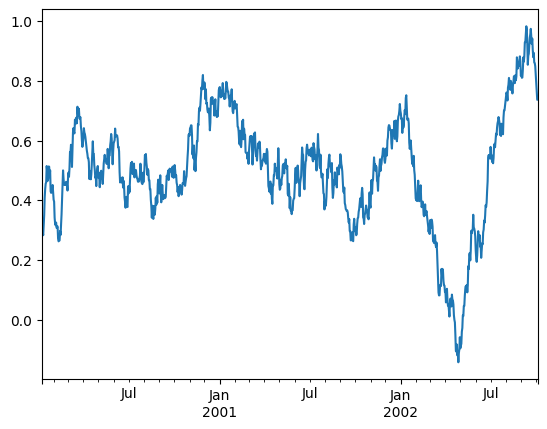

In [749]:
ts.plot();

In [750]:
transformed_ts = ts.groupby(lambda x: x.year).transform(
    lambda x: (x - x.mean()) / x.std()
    
)

<Axes: >

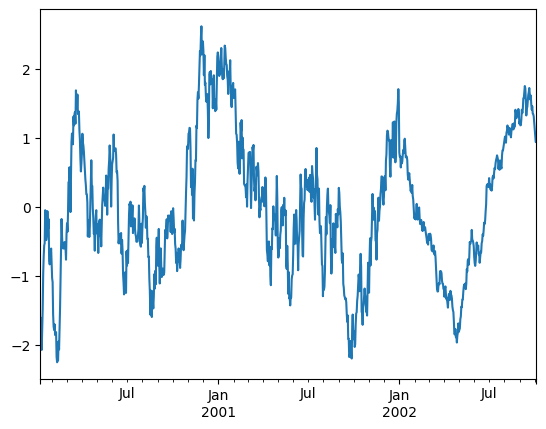

In [751]:
transformed_ts.plot()

In [752]:
ts.groupby(lambda x: x.year).agg(['mean', 'std'])

,mean,std
2000,0.519570,0.114143
2001,0.521007,0.117390
2002,0.450741,0.302059


In [753]:
transformed_ts.groupby(lambda x: x.year).agg(['mean', 'std'])

,mean,std
2000,6.086125e-16,1.0
2001,7.421765e-17,1.0
2002,1.915836e-16,1.0


<Axes: >

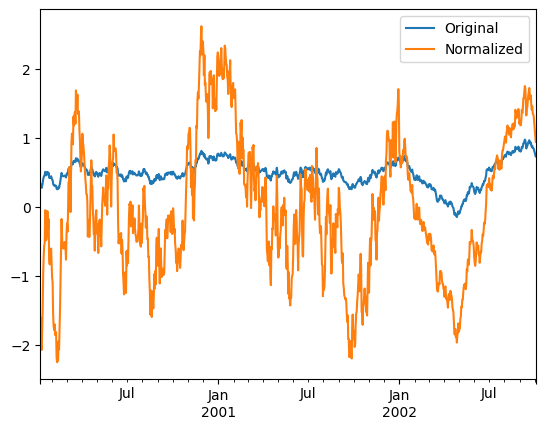

In [754]:
combined_ts = pd.DataFrame({'Original': ts, 'Normalized': transformed_ts})
combined_ts.plot()

In [755]:
combined_ts['range'] = ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

<Axes: >

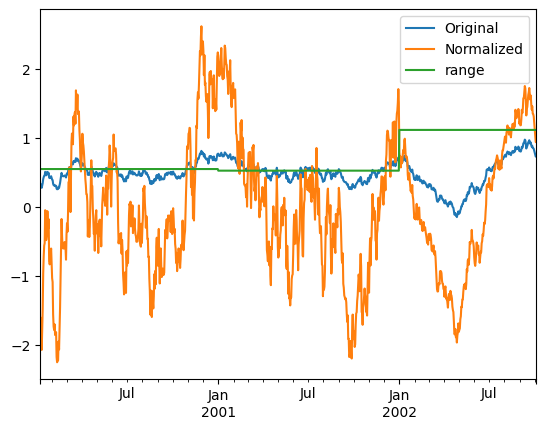

In [756]:
combined_ts.plot()

In [757]:
cols = ["A", "B", "C"]
values = np.random.randn(1000, 3)
values[np.random.randint(0, 1000, 100), 0] = np.nan
values[np.random.randint(0, 1000, 50), 1] = np.nan
values[np.random.randint(0, 1000, 200), 2] = np.nan
data_df = pd.DataFrame(values, columns=cols)
data_df.describe()

,A,B,C
count,901.000000,951.000000,819.000000
mean,0.011544,-0.009696,0.043737
std,0.987901,0.978068,1.001975
min,-2.993803,-3.599400,-3.264204
25%,-0.686349,-0.701010,-0.601734
50%,0.011353,-0.050997,0.034364
75%,0.717727,0.659546,0.714000
max,2.824613,3.001147,2.932290


In [758]:
countries = np.array(["US", "UK", "GR", "JP"])
key = countries[np.random.randint(0, 4, 1000)]
data_df['country'] = key
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        901 non-null    float64
 1   B        951 non-null    float64
 2   C        819 non-null    float64
 3   country  1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [759]:
transformed_df = data_df.groupby('country').transform(lambda x: x.fillna(x.mean()))

In [760]:
transformed_df.info()
data_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


,A,B,C,country
0,-1.411733,-0.865644,-0.907711,JP
1,-0.696014,0.077244,-0.204874,US
2,0.728679,-0.372725,0.503002,US
3,-0.156823,-1.396877,NaN,US
4,0.201380,1.131908,-0.119217,GR


In [761]:
transformed_df.head()

,A,B,C
0,-1.411733,-0.865644,-0.907711
1,-0.696014,0.077244,-0.204874
2,0.728679,-0.372725,0.503002
3,-0.156823,-1.396877,0.046087
4,0.201380,1.131908,-0.119217


In [762]:
data_df.groupby('country').mean()

,A,B,C
country,,,
GR,-0.099972,-0.118810,-0.047065
JP,0.098788,0.033251,0.150433
UK,0.014140,0.109827,0.022400
US,0.030425,-0.074213,0.046087


In [763]:
df_re = pd.DataFrame({"A": [1] * 10 + [5] * 10, "B": np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [764]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [765]:
df_re.groupby('A').rolling(4)['B'].mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [766]:
df_re.groupby('A').expanding()['B'].mean()

A    
1  0      0.0
   1      0.5
   2      1.0
   3      1.5
   4      2.0
   5      2.5
   6      3.0
   7      3.5
   8      4.0
   9      4.5
5  10    10.0
   11    10.5
   12    11.0
   13    11.5
   14    12.0
   15    12.5
   16    13.0
   17    13.5
   18    14.0
   19    14.5
Name: B, dtype: float64

In [767]:
df_ts = pd.DataFrame(
    {
        "date": pd.date_range(start="2016-01-01", periods=4, freq="W"),
        "group": [1, 1, 2, 2],
        "val": [5, 6, 7, 8],
    }
).set_index("date")
df_ts

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [768]:
df_ts.groupby('group').resample('1D', include_groups=False).ffill()

val
group date           
1     2016-01-03    5
      2016-01-04    5
      2016-01-05    5
      2016-01-06    5
      2016-01-07    5
      2016-01-08    5
      2016-01-09    5
      2016-01-10    6
2     2016-01-17    7
      2016-01-18    7
      2016-01-19    7
      2016-01-20    7
      2016-01-21    7
      2016-01-22    7
      2016-01-23    7
      2016-01-24    8

In [769]:
product_volumes = pd.DataFrame(
    {
        "group": list("xxxxyyy"),
        "product": list("abcdefg"),
        "volume": [10, 30, 20, 15, 40, 10, 20],
    }
)


product_volumes

,group,product,volume
0,x,a,10
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
5,y,f,10
6,y,g,20


In [770]:
product_volumes = product_volumes.sort_values("volume", ascending=False)

In [771]:
grouped = product_volumes.groupby('group')['volume']
cumpct = grouped.cumsum() / grouped.transform('sum')

In [772]:
cumpct

4    0.571429
1    0.400000
2    0.666667
6    0.857143
3    0.866667
0    1.000000
5    1.000000
Name: volume, dtype: float64

In [773]:
significant_products = product_volumes[cumpct <= 0.9]

In [774]:
significant_products.sort_values(['group', 'product'])

,group,product,volume
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
6,y,g,20


In [775]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [776]:
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [777]:
dff[dff.groupby('B').transform('size') > 2]

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [778]:
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [779]:
df

A    B
first second          
bar   one     1.0  0.0
      two     1.0  1.0
baz   one     NaN  2.0
      two     1.0  3.0
foo   one     2.0  4.0
      two     2.0  NaN
qux   one     3.0  6.0
      two     3.0  7.0

In [780]:
df.groupby('first').std(numeric_only=True)

,A,B
first,,
bar,0.0,0.707107
baz,NaN,0.707107
foo,0.0,NaN
qux,0.0,0.707107


In [781]:
from decimal import Decimal

df_dec = pd.DataFrame(
    {
        "id": [1, 2, 1, 2],
        "int_column": [1, 2, 3, 4],
        "dec_column": [
            Decimal("0.50"),
            Decimal("0.15"),
            Decimal("0.25"),
            Decimal("0.40"),
        ],
    }
)

In [782]:
df_dec

,id,int_column,dec_column
0,1,1,0.50
1,2,2,0.15
2,1,3,0.25
3,2,4,0.40


In [783]:
df_dec.groupby('id')['dec_column'].sum()

id
1    0.75
2    0.55
Name: dec_column, dtype: object

In [784]:
df = pd.DataFrame({"key": [1.0, 1.0, np.nan, 2.0, np.nan], "A": [1, 2, 3, 4, 5]})

In [785]:
df

,key,A
0,1.0,1
1,1.0,2
2,NaN,3
3,2.0,4
4,NaN,5


In [786]:
df.groupby('key', dropna=False).mean()

,A
key,
1.0,1.5
2.0,4.0
NaN,4.0


In [787]:
days = pd.Categorical(
    values=["Wed", "Mon", "Thu", "Mon", "Wed", "Sat"],
    categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
)


data = pd.DataFrame(
   {
       "day": days,
       "workers": [3, 4, 1, 4, 2, 2],
   }
)

In [788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   day      6 non-null      category
 1   workers  6 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 542.0 bytes


In [789]:
data

,day,workers
0,Wed,3
1,Mon,4
2,Thu,1
3,Mon,4
4,Wed,2
5,Sat,2


In [790]:
data.groupby('day', observed=False, sort=True).sum()

,workers
day,
Mon,8
Tue,0
Wed,5
Thu,1
Fri,0
Sat,2
Sun,0


In [791]:
import datetime

df = pd.DataFrame(
    {
        "Branch": "A A A A A A A B".split(),
        "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
        "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
        "Date": [
            datetime.datetime(2013, 1, 1, 13, 0),
            datetime.datetime(2013, 1, 1, 13, 5),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 12, 2, 12, 0),
            datetime.datetime(2013, 12, 2, 14, 0),
        ],
    }
)


df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2013-01-01 13:00:00
1,A,Mark,3,2013-01-01 13:05:00
2,A,Carl,5,2013-10-01 20:00:00
3,A,Carl,1,2013-10-02 10:00:00
4,A,Joe,8,2013-10-01 20:00:00
5,A,Joe,1,2013-10-02 10:00:00
6,A,Joe,9,2013-12-02 12:00:00
7,B,Carl,3,2013-12-02 14:00:00


In [792]:
df.groupby([pd.Grouper(freq='1ME', key='Date'), 'Buyer'])[['Quantity']].sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [793]:
df = df.set_index('Date')
df

,Branch,Buyer,Quantity
Date,,,
2013-01-01 13:00:00,A,Carl,1
2013-01-01 13:05:00,A,Mark,3
2013-10-01 20:00:00,A,Carl,5
2013-10-02 10:00:00,A,Carl,1
2013-10-01 20:00:00,A,Joe,8
2013-10-02 10:00:00,A,Joe,1
2013-12-02 12:00:00,A,Joe,9
2013-12-02 14:00:00,B,Carl,3


In [794]:
df['Date'] = df.index + pd.offsets.MonthEnd(2)
df

,Branch,Buyer,Quantity,Date
Date,,,,
2013-01-01 13:00:00,A,Carl,1,2013-02-28 13:00:00
2013-01-01 13:05:00,A,Mark,3,2013-02-28 13:05:00
2013-10-01 20:00:00,A,Carl,5,2013-11-30 20:00:00
2013-10-02 10:00:00,A,Carl,1,2013-11-30 10:00:00
2013-10-01 20:00:00,A,Joe,8,2013-11-30 20:00:00
2013-10-02 10:00:00,A,Joe,1,2013-11-30 10:00:00
2013-12-02 12:00:00,A,Joe,9,2014-01-31 12:00:00
2013-12-02 14:00:00,B,Carl,3,2014-01-31 14:00:00


In [795]:
df.groupby([pd.Grouper(freq='6ME', key='Date'), 'Buyer'])[['Quantity']].sum()

Quantity
Date       Buyer          
2013-02-28 Carl          1
           Mark          3
2014-02-28 Carl          9
           Joe          18

In [796]:
df.groupby([pd.Grouper(freq='6ME', level='Date'), 'Buyer'])[['Quantity']].sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2014-01-31 Carl          9
           Joe          18

In [797]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])
df

,A,B
0,1,NaN
1,1,4.0
2,5,6.0


In [798]:
df.groupby('A').nth(-1)

,A,B
1,1,4.0
2,5,6.0


In [799]:
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])
df

,a,b
2014-04-01,1,1
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [800]:
df.groupby([df.index.year, df.index.month]).nth([0, 3, -1])

,a,b
2014-04-01,1,1
2014-04-04,1,1
2014-04-30,1,1
2014-05-01,1,1
2014-05-06,1,1
2014-05-30,1,1
2014-06-02,1,1
2014-06-05,1,1
2014-06-30,1,1


In [801]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [802]:
dfg['idx'] = dfg.groupby('A').cumcount(ascending=False)
dfg

,A,idx
0,a,3
1,a,2
2,a,1
3,b,1
4,b,0
5,a,0


In [803]:
dfg['group_idx'] = dfg.groupby('A').ngroup()
dfg

,A,idx,group_idx
0,a,3,0
1,a,2,0
2,a,1,0
3,b,1,1
4,b,0,1
5,a,0,0


In [804]:
np.random.seed(1234)

df = pd.DataFrame(np.random.randn(50, 2))

df["g"] = np.random.choice(["A", "B"], size=50)

df.loc[df["g"] == "B", 1] += 3
df

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B
5,1.150036,0.991946,A
6,0.953324,-2.021255,A
7,-0.334077,0.002118,A
8,0.405453,0.289092,A
9,1.321158,-1.546906,A


A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

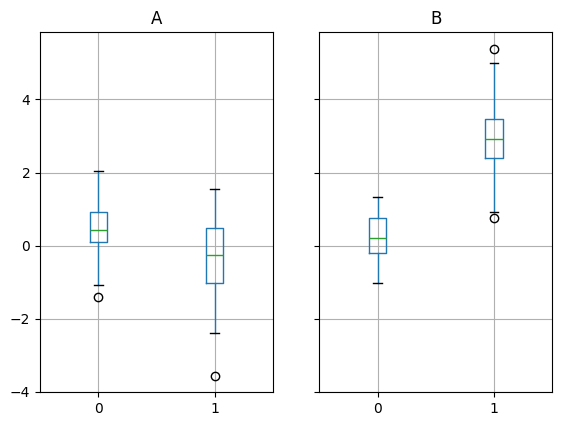

In [805]:
df.groupby('g').boxplot()

In [806]:
n = 1000

df = pd.DataFrame(
    {
        "Store": np.random.choice(["Store_1", "Store_2"], n),
        "Product": np.random.choice(["Product_1", "Product_2"], n),
        "Revenue": (np.random.random(n) * 50 + 10).round(2),
        "Quantity": np.random.randint(1, 10, size=n),
    }
)
df.head()

,Store,Product,Revenue,Quantity
0,Store_2,Product_1,26.12,1
1,Store_2,Product_1,28.86,1
2,Store_2,Product_1,35.11,9
3,Store_1,Product_1,32.50,1
4,Store_1,Product_2,33.37,1


In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Store     1000 non-null   object 
 1   Product   1000 non-null   object 
 2   Revenue   1000 non-null   float64
 3   Quantity  1000 non-null   int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 27.5+ KB


In [808]:
df1 = df.groupby(['Store', 'Product']).sum()

In [809]:
df1

Revenue  Quantity
Store   Product                     
Store_1 Product_1  6855.30      1005
        Product_2  9580.36      1358
Store_2 Product_1  9298.34      1477
        Product_2  8671.09      1306

In [810]:
df1['Price'] = df1['Revenue'] / df1['Quantity']
df1

Revenue  Quantity     Price
Store   Product                               
Store_1 Product_1  6855.30      1005  6.821194
        Product_2  9580.36      1358  7.054757
Store_2 Product_1  9298.34      1477  6.295423
        Product_2  8671.09      1306  6.639426

In [811]:
df1['Price'].unstack()

Product,Product_1,Product_2
Store,,
Store_1,6.821194,7.054757
Store_2,6.295423,6.639426


In [812]:
(
    df.groupby(['Store', 'Product'])
    .pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum())
    .unstack()
    .round(2)
)

Product,Product_1,Product_2
Store,,
Store_1,6.82,7.05
Store_2,6.30,6.64


In [813]:
df = pd.DataFrame(
    {
        "a": [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
        "b": [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        "c": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        "d": [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    }
)
df

,a,b,c,d
0,0,0,1,0
1,0,0,0,0
2,0,1,1,0
3,0,1,0,1
4,1,0,1,0
5,1,0,0,0
6,1,1,1,0
7,1,1,0,1
8,2,0,1,0
9,2,0,0,0


In [814]:
def compute_metrics(x):
    result = {'b_sum': x['b'].sum(), 'c_mean': x['c'].mean()}
    return pd.Series(result, name='metrics')

In [815]:
result = df.groupby('a').apply(compute_metrics, include_groups=False)
result

metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [816]:
s = pd.Series(np.random.randn(10))

In [817]:
s

0   -0.793893
1    0.321153
2    0.342250
3    1.618906
4   -0.975807
5    1.918201
6   -0.810847
7   -1.405919
8   -1.977759
9    0.461659
dtype: float64

In [818]:
s.rolling(window=3).mean()

0         NaN
1         NaN
2   -0.043497
3    0.760770
4    0.328450
5    0.853767
6    0.043849
7   -0.099522
8   -1.398175
9   -0.974006
dtype: float64

In [819]:
s = pd.Series(range(10), index=pd.date_range('2020-01-01', periods=10, freq='1D'))
s.rolling(window="3D").sum()

2020-01-01     0.0
2020-01-02     1.0
2020-01-03     3.0
2020-01-04     6.0
2020-01-05     9.0
2020-01-06    12.0
2020-01-07    15.0
2020-01-08    18.0
2020-01-09    21.0
2020-01-10    24.0
Freq: D, dtype: float64

In [820]:
s

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int64

In [821]:
df = pd.DataFrame({'A': ['a', 'b', 'a', 'b', 'a'], 'B': range(5)})
df

,A,B
0,a,0
1,b,1
2,a,2
3,b,3
4,a,4


In [822]:
df.groupby('A').rolling(window=2).sum()

B
A       
a 0  NaN
  2  2.0
  4  6.0
b 1  NaN
  3  4.0

In [823]:
def weighted_mean(x):
    arr = np.ones((1, x.shape[1]))
    arr[:, :2] = (x[:, :2] * x[:, 2]).sum(axis=0) / x[:, 2].sum()
    return arr

In [824]:
df = pd.DataFrame([[1, 2, 0.6], [2, 3, 0.4], [3, 4, 0.2], [4, 5, 0.7]])
df

,0,1,2
0,1,2,0.6
1,2,3,0.4
2,3,4,0.2
3,4,5,0.7


In [825]:
df.rolling(2, method='table', min_periods=0).apply(weighted_mean, raw=True, engine='numba')

,0,1,2
0,1.000000,2.000000,1.0
1,1.800000,2.000000,1.0
2,3.333333,2.333333,1.0
3,1.555556,7.000000,1.0


In [826]:
df = pd.DataFrame([[1, 2, 0.6], [2, 3, 0.4], [3, 4, 0.2], [4, 5, 0.7]])
df

,0,1,2
0,1,2,0.6
1,2,3,0.4
2,3,4,0.2
3,4,5,0.7


In [827]:
df.ewm(0.5).mean()

,0,1,2
0,1.000000,2.000000,0.600000
1,1.750000,2.750000,0.450000
2,2.615385,3.615385,0.276923
3,3.550000,4.550000,0.562500


In [828]:
online_ewm = df.head(3).ewm(0.5).online()
online_ewm

OnlineExponentialMovingWindow [com=0.5,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [829]:
online_ewm.mean()

,0,1,2
0,1.000000,2.000000,0.600000
1,1.750000,2.750000,0.450000
2,2.615385,3.615385,0.276923


In [830]:
online_ewm.mean(update=df.tail(1))

,0,1,2
3,3.55,4.55,0.5625


In [831]:
s = pd.Series([np.nan, 1, 2, np.nan, np.nan, 3])
s

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [832]:
s.rolling(window=3, min_periods=2).sum()

0    NaN
1    NaN
2    3.0
3    3.0
4    NaN
5    NaN
dtype: float64

In [833]:
df = pd.DataFrame({"A": range(5), "B": range(10, 15)})
df

,A,B
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14


In [834]:
df.rolling(window=3).agg(['sum', 'mean'])

A          B      
   sum mean   sum  mean
0  NaN  NaN   NaN   NaN
1  NaN  NaN   NaN   NaN
2  3.0  1.0  33.0  11.0
3  6.0  2.0  36.0  12.0
4  9.0  3.0  39.0  13.0

In [835]:
times = ['2020-01-01', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-29']

s = pd.Series(range(5), index=pd.DatetimeIndex(times))

s

2020-01-01    0
2020-01-03    1
2020-01-04    2
2020-01-05    3
2020-01-29    4
dtype: int64

In [836]:
s.rolling(window=2).sum()

2020-01-01    NaN
2020-01-03    1.0
2020-01-04    3.0
2020-01-05    5.0
2020-01-29    7.0
dtype: float64

In [837]:
s.rolling(window='2D').sum()

2020-01-01    0.0
2020-01-03    1.0
2020-01-04    3.0
2020-01-05    5.0
2020-01-29    4.0
dtype: float64

In [838]:
df = pd.DataFrame(
    {"x": 1},
    index=[
        pd.Timestamp("20130101 09:00:01"),
        pd.Timestamp("20130101 09:00:02"),
        pd.Timestamp("20130101 09:00:03"),
        pd.Timestamp("20130101 09:00:04"),
        pd.Timestamp("20130101 09:00:06"),
    ],
)
df

,x
2013-01-01 09:00:01,1
2013-01-01 09:00:02,1
2013-01-01 09:00:03,1
2013-01-01 09:00:04,1
2013-01-01 09:00:06,1


In [839]:
df.rolling("2s", closed="both").x.sum()

2013-01-01 09:00:01    1.0
2013-01-01 09:00:02    2.0
2013-01-01 09:00:03    3.0
2013-01-01 09:00:04    3.0
2013-01-01 09:00:06    2.0
Name: x, dtype: float64

In [840]:
from pandas.api.indexers import VariableOffsetWindowIndexer

df = pd.DataFrame(range(10), index=pd.date_range("2020", periods=10))

offset = pd.offsets.BDay(1)

indexer = VariableOffsetWindowIndexer(index=df.index, offset=offset)

df

,0
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [841]:
df.rolling(indexer).sum()

,0
2020-01-01,0.0
2020-01-02,1.0
2020-01-03,2.0
2020-01-04,3.0
2020-01-05,7.0
2020-01-06,12.0
2020-01-07,6.0
2020-01-08,7.0
2020-01-09,8.0
2020-01-10,9.0


In [842]:
df = pd.DataFrame(
    np.random.randn(10, 4),
    index=pd.date_range("2020-01-01", periods=10),
    columns=["A", "B", "C", "D"],
)
df

,A,B,C,D
2020-01-01,0.730057,-1.316938,-0.751328,0.528290
2020-01-02,-0.257759,-1.081009,0.505895,-1.701948
2020-01-03,-1.006349,0.020208,-1.157426,-0.096491
2020-01-04,0.999344,-1.482012,0.189291,0.926828
2020-01-05,-0.029095,1.776600,-1.334294,2.085399
2020-01-06,-0.633036,0.208208,-1.723333,-0.355486
2020-01-07,-0.143959,0.177635,1.071746,-0.516876
2020-01-08,-0.382709,0.888600,-0.156260,-0.720254
2020-01-09,-0.837161,-0.426902,-0.354174,0.510804
2020-01-10,0.156535,0.294767,-1.448608,-1.191084


In [843]:
df.rolling(window=5).corr(df['A'])

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,1.0,-0.471073,0.356584,0.365258
2020-01-06,1.0,-0.389720,0.566667,0.413165
2020-01-07,1.0,-0.455836,0.518336,0.480917
2020-01-08,1.0,-0.659393,0.404028,0.500362
2020-01-09,1.0,0.773971,0.218184,0.319350
2020-01-10,1.0,0.445378,0.059986,-0.893609


In [844]:
df.loc[:,'B':'D'].rolling(window=5).cov(df.loc[:,'A':'C'], pairwise=True)

B         C         D
2020-01-01 A       NaN       NaN       NaN
           B       NaN       NaN       NaN
           C       NaN       NaN       NaN
2020-01-02 A       NaN       NaN       NaN
           B       NaN       NaN       NaN
           C       NaN       NaN       NaN
2020-01-03 A       NaN       NaN       NaN
           B       NaN       NaN       NaN
           C       NaN       NaN       NaN
2020-01-04 A       NaN       NaN       NaN
           B       NaN       NaN       NaN
           C       NaN       NaN       NaN
2020-01-05 A -0.513533  0.234032  0.408761
           B  1.847020 -0.823343  1.049825
           C -0.823343  0.669478 -0.716406
2020-01-06 A -0.377418  0.425197  0.446372
           B  1.625683 -0.993235  1.047749
           C -0.993235  0.975930 -0.534895
2020-01-07 A -0.399126  0.462257  0.398596
           B  1.332450 -0.607230  0.469309
           C -0.607230  1.382271 -0.307380
2020-01-08 A -0.492682  0.287610  0.373607
           B  1.431202 -0.586377  0.270005
           C -0.586377  1.299096 -0.470357
2020-01-09 A  0.217882  0.080071  0.123359
           B  0.706461 -0.304114  0.538575
           C -0.304114  1.200599 -0.572797
2020-01-10 A  0.081630  0.026327 -0.218889
           B  0.218168  0.003335 -0.213933
           C  0.003335  1.250940  0.132243

In [845]:
df.rolling(window=5).corr(df, pairwise=True)

A         B         C         D
2020-01-01 A       NaN       NaN       NaN       NaN
           B       NaN       NaN       NaN       NaN
           C       NaN       NaN       NaN       NaN
           D       NaN       NaN       NaN       NaN
2020-01-02 A       NaN       NaN       NaN       NaN
           B       NaN       NaN       NaN       NaN
           C       NaN       NaN       NaN       NaN
           D       NaN       NaN       NaN       NaN
2020-01-03 A       NaN       NaN       NaN       NaN
           B       NaN       NaN       NaN       NaN
           C       NaN       NaN       NaN       NaN
           D       NaN       NaN       NaN       NaN
2020-01-04 A       NaN       NaN       NaN       NaN
           B       NaN       NaN       NaN       NaN
           C       NaN       NaN       NaN       NaN
           D       NaN       NaN       NaN       NaN
2020-01-05 A  1.000000 -0.471073  0.356584  0.365258
           B -0.471073  1.000000 -0.740418  0.553675
           C  0.356584 -0.740418  1.000000 -0.627575
           D  0.365258  0.553675 -0.627575  1.000000
2020-01-06 A  1.000000 -0.389720  0.566667  0.413165
           B -0.389720  1.000000 -0.788541  0.577721
           C  0.566667 -0.788541  1.000000 -0.380660
           D  0.413165  0.577721 -0.380660  1.000000
2020-01-07 A  1.000000 -0.455836  0.518336  0.480917
           B -0.455836  1.000000 -0.447436  0.372089
           C  0.518336 -0.447436  1.000000 -0.239272
           D  0.480917  0.372089 -0.239272  1.000000
2020-01-08 A  1.000000 -0.659393  0.404028  0.500362
           B -0.659393  1.000000 -0.430037  0.188783
           C  0.404028 -0.430037  1.000000 -0.345182
           D  0.500362  0.188783 -0.345182  1.000000
2020-01-09 A  1.000000  0.773971  0.218184  0.319350
           B  0.773971  1.000000 -0.330213  0.555583
           C  0.218184 -0.330213  1.000000 -0.453261
           D  0.319350  0.555583 -0.453261  1.000000
2020-01-10 A  1.000000  0.445378  0.059986 -0.893609
           B  0.445378  1.000000  0.006384 -0.733725
           C  0.059986  0.006384  1.000000  0.189410
           D -0.893609 -0.733725  0.189410  1.000000

In [846]:
import scipy

In [847]:
s = pd.Series(range(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [848]:
s.rolling(window=5, win_type='triang').mean()

0    NaN
1    NaN
2    NaN
3    NaN
4    2.0
5    3.0
6    4.0
7    5.0
8    6.0
9    7.0
dtype: float64

In [849]:
s.rolling(window=5, win_type='gaussian').mean(std=0.1)

0    NaN
1    NaN
2    NaN
3    NaN
4    2.0
5    3.0
6    4.0
7    5.0
8    6.0
9    7.0
dtype: float64

In [850]:
df.rolling(window=len(df), min_periods=3).mean()

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.178017,-0.792580,-0.467620,-0.423383
2020-01-04,0.116323,-0.964938,-0.303392,-0.085830
2020-01-05,0.087240,-0.416630,-0.509572,0.348416
2020-01-06,-0.032806,-0.312490,-0.711866,0.231099
2020-01-07,-0.048685,-0.242473,-0.457064,0.124245
2020-01-08,-0.090438,-0.101089,-0.419464,0.018683
2020-01-09,-0.173407,-0.137290,-0.412209,0.073363
2020-01-10,-0.140413,-0.094084,-0.515849,-0.053082


In [851]:
df.expanding(min_periods=3).mean()

,A,B,C,D
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.178017,-0.792580,-0.467620,-0.423383
2020-01-04,0.116323,-0.964938,-0.303392,-0.085830
2020-01-05,0.087240,-0.416630,-0.509572,0.348416
2020-01-06,-0.032806,-0.312490,-0.711866,0.231099
2020-01-07,-0.048685,-0.242473,-0.457064,0.124245
2020-01-08,-0.090438,-0.101089,-0.419464,0.018683
2020-01-09,-0.173407,-0.137290,-0.412209,0.073363
2020-01-10,-0.140413,-0.094084,-0.515849,-0.053082


In [852]:
df.ewm(halflife='4 days', times=df.index).mean()

,A,B,C,D
2020-01-01,0.730057,-1.316938,-0.751328,0.528290
2020-01-02,0.193462,-1.188778,-0.068387,-0.683206
2020-01-03,-0.277421,-0.714294,-0.495796,-0.452941
2020-01-04,0.128855,-0.958588,-0.277796,-0.013889
2020-01-05,0.085493,-0.207700,-0.567835,0.562426
2020-01-06,-0.091351,-0.105337,-0.852227,0.336509
2020-01-07,-0.103263,-0.041267,-0.416604,0.143287
2020-01-08,-0.162544,0.155993,-0.361375,-0.039903
2020-01-09,-0.298448,0.038567,-0.359925,0.071039
2020-01-10,-0.210514,0.088082,-0.570334,-0.172890


In [853]:
import datetime

In [854]:
dt = pd.to_datetime(['1/1/2028', np.datetime64('2018-12-31'), datetime.datetime(2018, 3, 31)])

In [855]:
dt

DatetimeIndex(['2028-01-01', '2018-12-31', '2018-03-31'], dtype='datetime64[ns]', freq=None)

In [856]:
dt1 = pd.date_range('2018-01-01', periods=3, freq='h')

In [857]:
if dt1.tz is None:
    dt1 = dt1.tz_localize('UTC')
else:
    dt1 = dt1.tz_convert('UTC')

dt1


DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='h')

In [858]:
idx = pd.date_range("1/1/1998", freq='D', periods=10)
ts = pd.Series(np.random.randn(10), index=idx)
ts

1998-01-01   -0.128338
1998-01-02   -0.687717
1998-01-03   -2.100928
1998-01-04    1.025928
1998-01-05   -0.007973
1998-01-06   -1.336035
1998-01-07    0.915382
1998-01-08   -0.130655
1998-01-09    0.022627
1998-01-10   -1.425459
Freq: D, dtype: float64

In [859]:
ts.resample('3D').mean()

1998-01-01   -0.972328
1998-01-04   -0.106027
1998-01-07    0.269118
1998-01-10   -1.425459
Freq: 3D, dtype: float64

In [860]:
ts.rolling(window='3D', min_periods=3).mean()

1998-01-01         NaN
1998-01-02         NaN
1998-01-03   -0.972328
1998-01-04   -0.587572
1998-01-05   -0.360991
1998-01-06   -0.106027
1998-01-07   -0.142875
1998-01-08   -0.183769
1998-01-09    0.269118
1998-01-10   -0.511162
Freq: D, dtype: float64

In [861]:
friday = pd.to_datetime('1/5/2018')
friday.day_name()

'Friday'

In [862]:
sat = friday + pd.Timedelta('8D')
sat.day_name()

'Saturday'

In [863]:
nextd = sat + pd.offsets.BDay(1)
nextd.day_name()

'Monday'

In [864]:
friday2 = pd.Timestamp("2018-01-05")
friday2

Timestamp('2018-01-05 00:00:00')

In [865]:
period = pd.Period("2018-01-01")
period

Period('2018-01-01', 'D')

In [866]:
period = pd.Series(pd.period_range("1/31/2000", freq="M", periods=10))
period

0    2000-01
1    2000-02
2    2000-03
3    2000-04
4    2000-05
5    2000-06
6    2000-07
7    2000-08
8    2000-09
9    2000-10
dtype: period[M]

In [867]:
pd.Timestamp(pd.NaT)

NaT

In [868]:
pd.Timestamp(2012, 1, 1)

Timestamp('2012-01-01 00:00:00')

In [869]:
pd.Timestamp(datetime.datetime(2012, 1, 1))

Timestamp('2012-01-01 00:00:00')

In [870]:
dates = [
    pd.Timestamp("2012-05-01"),
    pd.Timestamp("2012-05-02"),
    pd.Timestamp("2012-05-03"),
]
dates

[Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-05-02 00:00:00'),
 Timestamp('2012-05-03 00:00:00')]

In [871]:
ts = pd.Series(np.random.randn(3), index=dates)
ts

2012-05-01    0.271939
2012-05-02    0.169543
2012-05-03    0.692513
dtype: float64

In [872]:
ts.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

In [873]:
periods = [pd.Period("2012-01"), pd.Period("2012-02"), pd.Period("2012-03")]
periods

[Period('2012-01', 'M'), Period('2012-02', 'M'), Period('2012-03', 'M')]

In [874]:
ts2 = pd.Series(np.random.randn(3), index=periods)
ts2

2012-01   -1.231139
2012-02    1.692870
2012-03    0.783855
Freq: M, dtype: float64

In [875]:
ts2.index

PeriodIndex(['2012-01', '2012-02', '2012-03'], dtype='period[M]')

In [876]:
ts3 = pd.Series(['July 31, 2009', '2009-08-31', None])
ts3

0    July 31, 2009
1       2009-08-31
2             None
dtype: object

In [877]:
ts3 = pd.to_datetime(ts3, format='mixed')
ts3

0   2009-07-31
1   2009-08-31
2          NaT
dtype: datetime64[ns]

In [878]:
df = pd.DataFrame(
    {"year": [2015, 2016], "month": [2, 3], "day": [4, 5], "hour": [2, 3],
     'value': [1.2, 3.6]}
)
df

,year,month,day,hour,value
0,2015,2,4,2,1.2
1,2016,3,5,3,3.6


In [879]:
df.index = pd.to_datetime(df.loc[:,'year':'hour'])

In [880]:
df.drop(['year', 'month'], axis=1)

,day,hour,value
2015-02-04 02:00:00,4,2,1.2
2016-03-05 03:00:00,5,3,3.6


In [881]:
weekmask = 'Mon Wed Fri'
holidays = [datetime.datetime(2011, 1, 5), datetime.datetime(2011, 3, 14)]
pd.bdate_range("2011/1/1", periods=365, freq='C', weekmask=weekmask, holidays=holidays)

DatetimeIndex(['2011-01-03', '2011-01-07', '2011-01-10', '2011-01-12',
               '2011-01-14', '2011-01-17', '2011-01-19', '2011-01-21',
               '2011-01-24', '2011-01-26',
               ...
               '2013-04-15', '2013-04-17', '2013-04-19', '2013-04-22',
               '2013-04-24', '2013-04-26', '2013-04-29', '2013-05-01',
               '2013-05-03', '2013-05-06'],
              dtype='datetime64[ns]', length=365, freq='C')

In [882]:
start = datetime.datetime(2011, 1, 1)

end = datetime.datetime(2012, 1, 1)

In [883]:
rng = pd.date_range(start, end, freq="BME")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2011-01-31   -0.721626
2011-02-28    1.698994
2011-03-31   -0.349882
2011-04-29    1.586451
2011-05-31    1.454199
2011-06-30    0.149458
2011-07-29    1.018393
2011-08-31   -0.565651
2011-09-30   -1.590951
2011-10-31   -0.651777
2011-11-30    0.456407
2011-12-30    1.134054
Freq: BME, dtype: float64

In [884]:
ts.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31', '2011-06-30', '2011-07-29', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30'],
              dtype='datetime64[ns]', freq='BME')

In [886]:
ts['2/28/2011']

np.float64(1.6989940645981)

In [887]:
ts['2011-10']

2011-10-31   -0.651777
Freq: BME, dtype: float64

In [888]:
ts['2011-02-28':'2011-05-31']

2011-02-28    1.698994
2011-03-31   -0.349882
2011-04-29    1.586451
2011-05-31    1.454199
Freq: BME, dtype: float64

In [889]:
dft2 = pd.DataFrame(
    np.random.randn(20, 1),
    columns=["A"],
    index=pd.MultiIndex.from_product(
        [pd.date_range("20130101", periods=10, freq="12h"), ["a", "b"]]
    ),
)
dft2

A
2013-01-01 00:00:00 a  1.695493
                    b  1.632303
2013-01-01 12:00:00 a -1.726092
                    b  0.486227
2013-01-02 00:00:00 a -0.625187
                    b  0.386616
2013-01-02 12:00:00 a -0.048112
                    b -2.598355
2013-01-03 00:00:00 a -0.871135
                    b -0.209156
2013-01-03 12:00:00 a  0.004590
                    b  0.449006
2013-01-04 00:00:00 a  0.573428
                    b  0.697186
2013-01-04 12:00:00 a -2.442512
                    b -1.423556
2013-01-05 00:00:00 a -0.304997
                    b  0.672794
2013-01-05 12:00:00 a  0.954090
                    b  1.323584

In [891]:
dft2.swaplevel(0,1).sort_index()

A
a 2013-01-01 00:00:00  1.695493
  2013-01-01 12:00:00 -1.726092
  2013-01-02 00:00:00 -0.625187
  2013-01-02 12:00:00 -0.048112
  2013-01-03 00:00:00 -0.871135
  2013-01-03 12:00:00  0.004590
  2013-01-04 00:00:00  0.573428
  2013-01-04 12:00:00 -2.442512
  2013-01-05 00:00:00 -0.304997
  2013-01-05 12:00:00  0.954090
b 2013-01-01 00:00:00  1.632303
  2013-01-01 12:00:00  0.486227
  2013-01-02 00:00:00  0.386616
  2013-01-02 12:00:00 -2.598355
  2013-01-03 00:00:00 -0.209156
  2013-01-03 12:00:00  0.449006
  2013-01-04 00:00:00  0.697186
  2013-01-04 12:00:00 -1.423556
  2013-01-05 00:00:00  0.672794
  2013-01-05 12:00:00  1.323584

In [894]:
ts = pd.Timestamp('2025-03-08')
ts + pd.Timedelta(days=3)


Timestamp('2025-03-11 00:00:00')

In [897]:
ts + pd.DateOffset(days=3)

Timestamp('2025-03-11 00:00:00')